In [68]:
# Importer les packages nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [69]:
# Importer les packages machine learning
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, classification_report    

In [70]:
# Importer la base de données
from sklearn.datasets import load_iris
iris = load_iris()

In [71]:
# Création du dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [72]:
# Affichage du dataframe
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


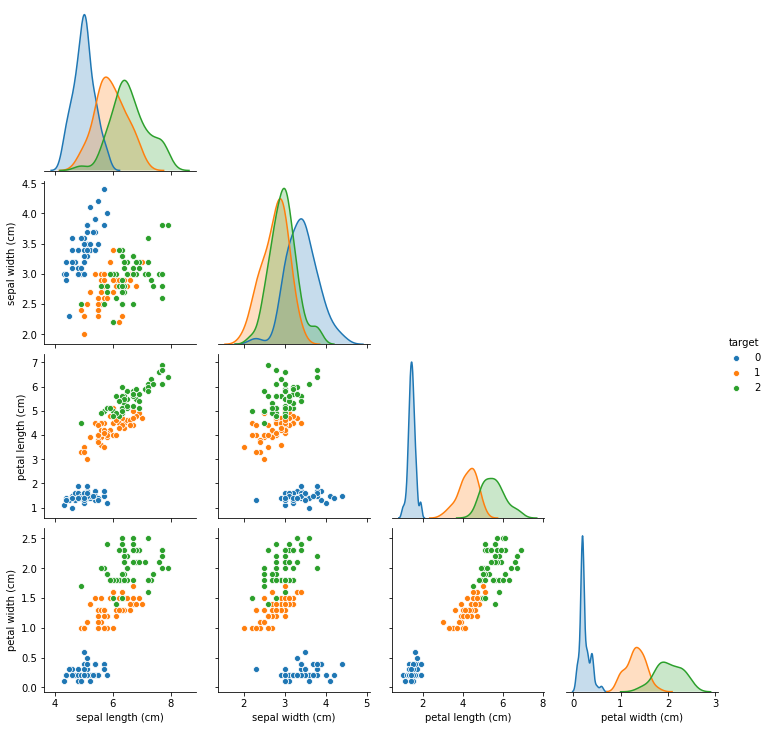

In [73]:
# Vision générale sur dataframe
sns.pairplot(df, corner = True, hue ='target', vars=iris['feature_names'])

In [74]:
# Séparation du jeu de données entre les datas et les targets
X = df.iloc[:, 0:4]
y = df.iloc[:,-1]

In [75]:
# Création du model
model = RandomForestClassifier(n_estimators=100, random_state = 0)

In [76]:
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [77]:
# Appliquer le modèle
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [78]:
# Vérifier la précision méthod 2
print(model.score(X_test, y_test))

1.0


In [79]:
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



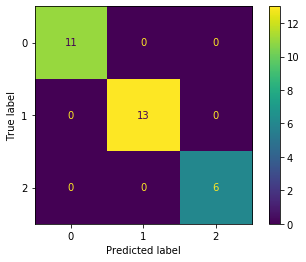

In [80]:
# Matrice de correlation
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [84]:
# Importance des features d'entrées sur la prédiction
feature_imp = pd.Series(model.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.446895
petal length (cm)    0.420177
sepal length (cm)    0.102820
sepal width (cm)     0.030108
dtype: float64

No handles with labels found to put in legend.


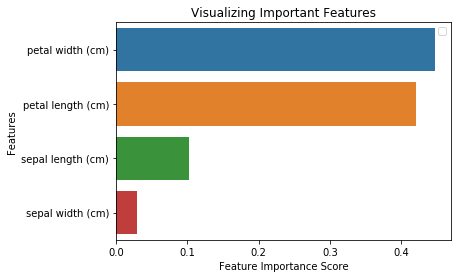

In [86]:
# Visualisation de l'importance des features d'entrées sur la prédiction 
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

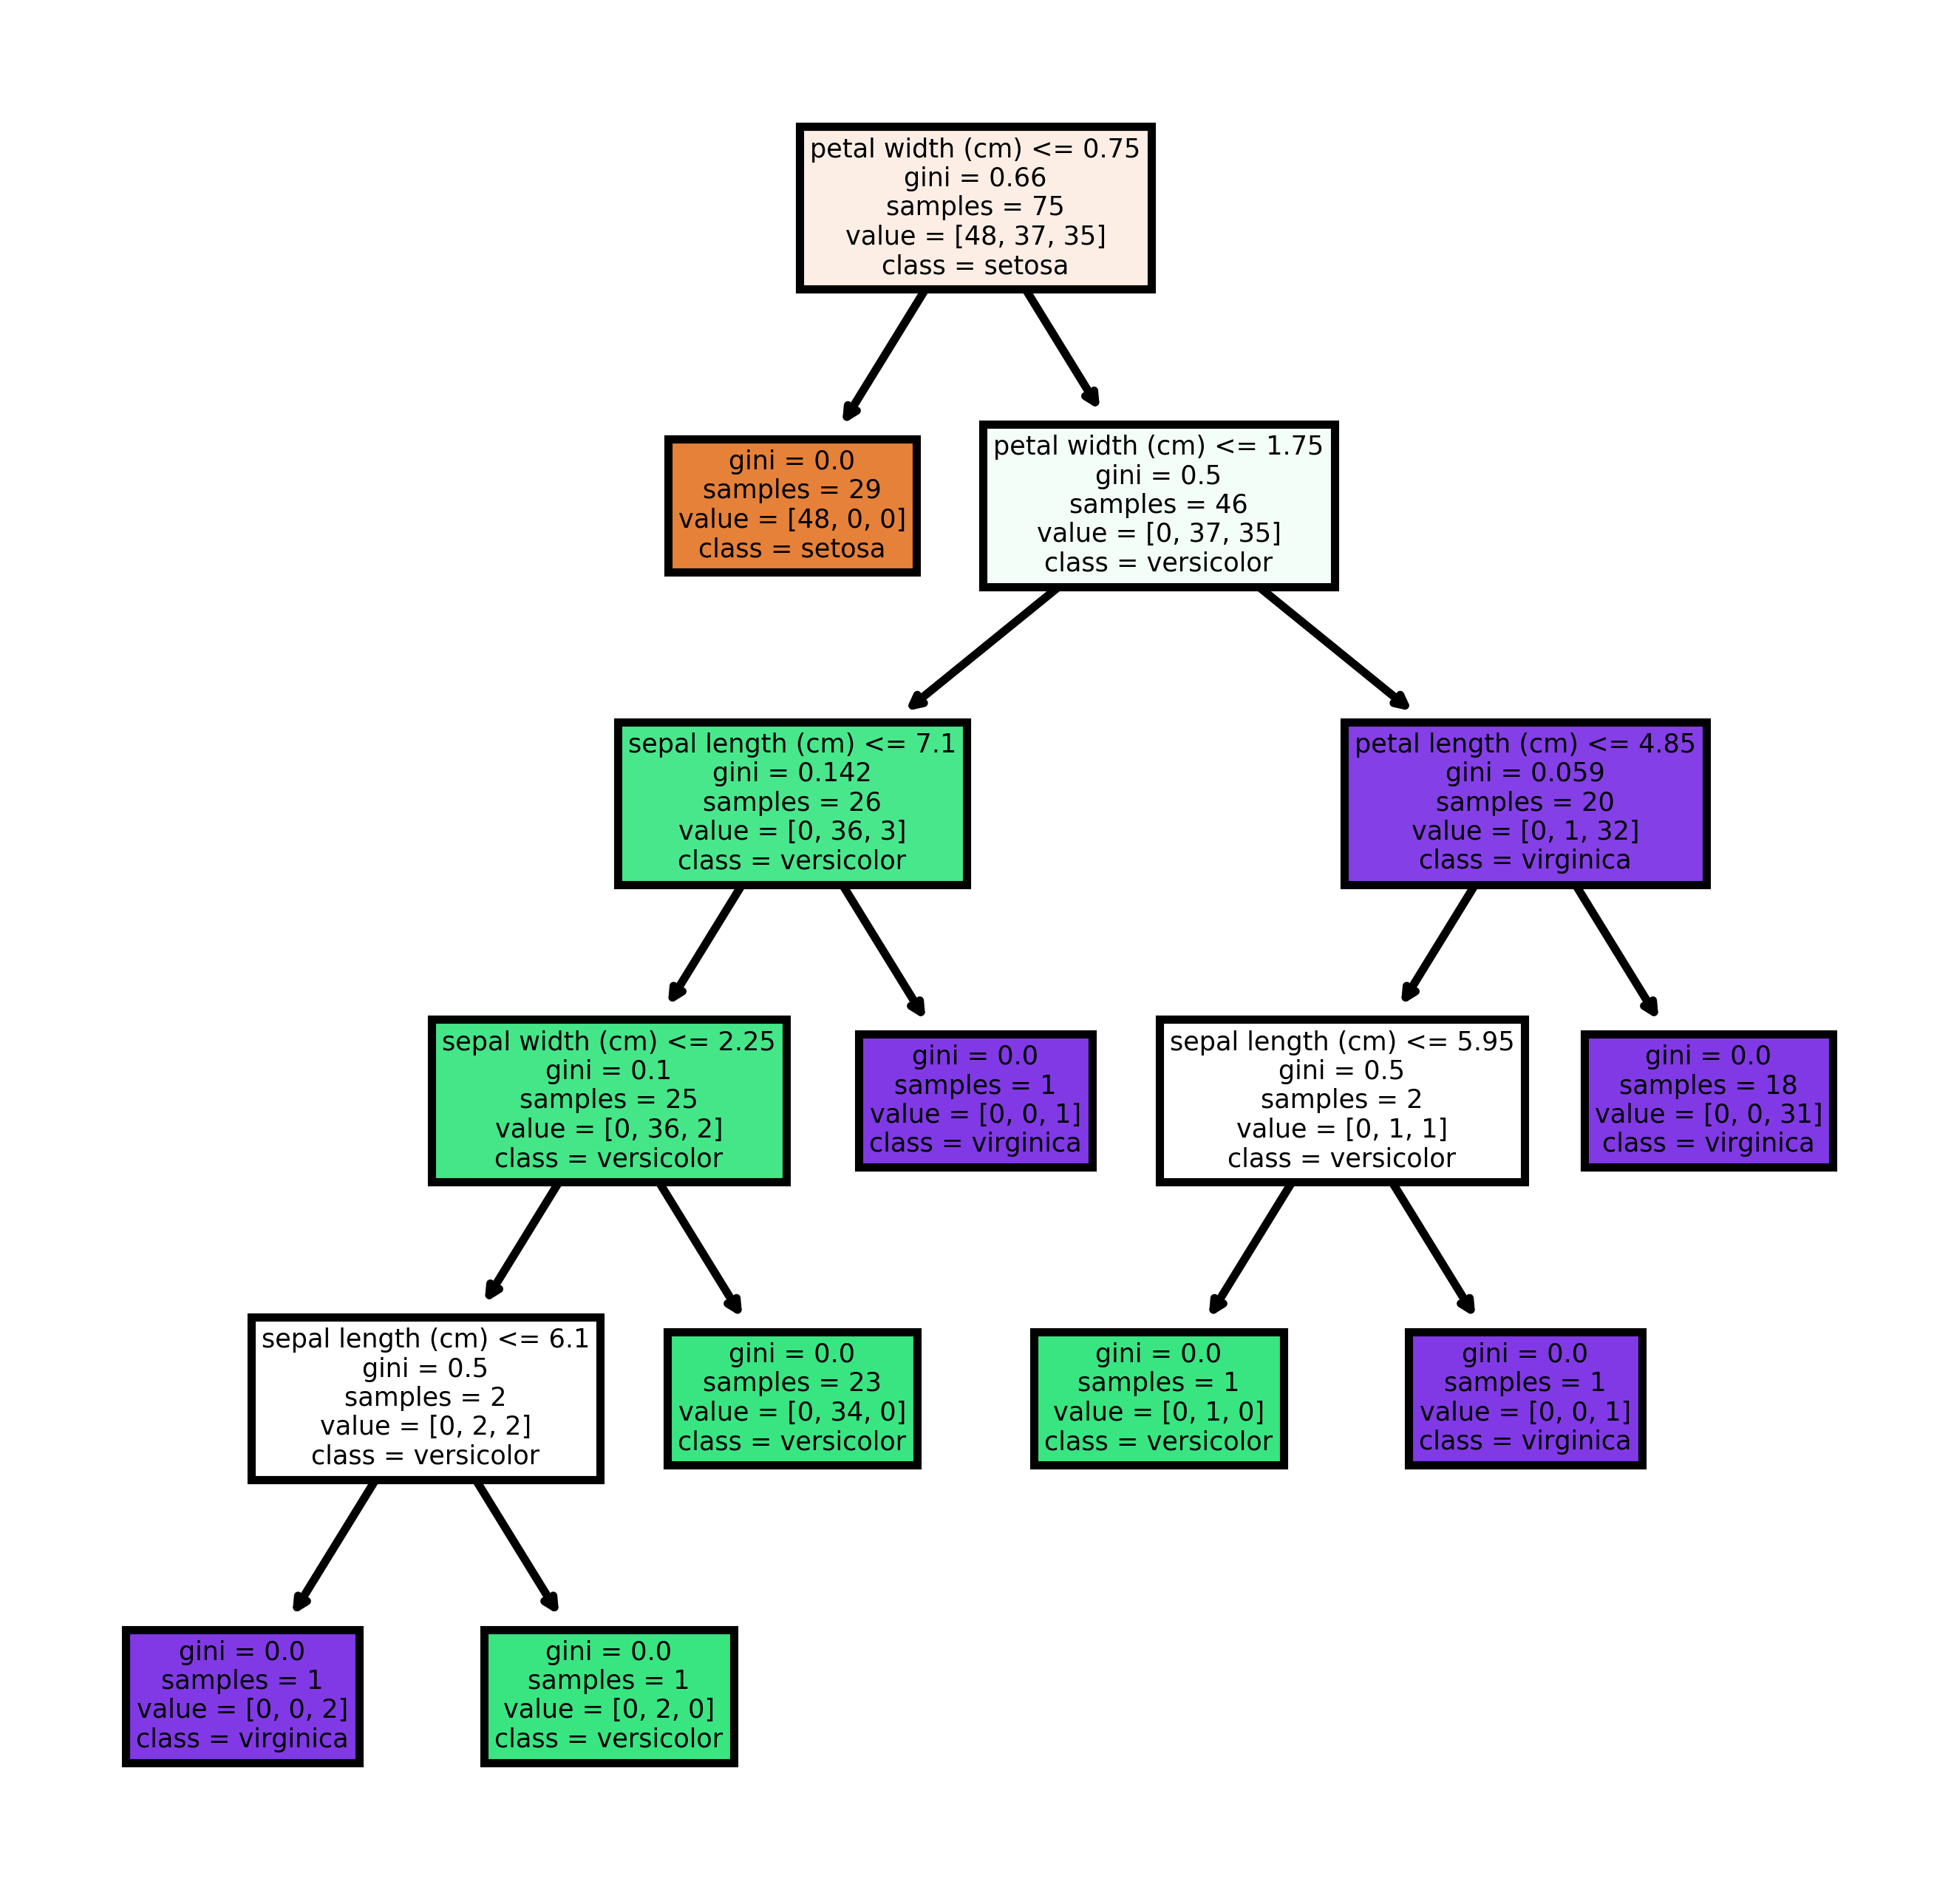

In [87]:
fn=iris.feature_names
cn=iris.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[5],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')